In [1]:
from mlband.imports import *
import mlband.data
import mlband.config
import mlband.model
import mlband.features

In [2]:
data_set_path = 'data/mp-test-3/'
results_dir = 'results/test-3/'

print('Preparing the config...', flush=True)
config = mlband.config.Config(
    data_path=data_set_path, 
    workers=4, 
    results_dir=results_dir,
    original_features=True,
    print_freq=1,
    epochs=3,
    )

Preparing the config...


In [3]:
print('Downloading the data from MP...' ,flush=True)
df, data = mlband.data.get_list_of_materials(num_chunks=1)

Retrieving SummaryDoc documents:   0%|          | 0/1000 [00:00<?, ?it/s]

Number of missing values:  0


In [4]:
df = df[:100]

In [5]:
print('Creating the dataset...', flush=True)
mlband.data.create_dataset(df=df, path=data_set_path)

Creating the dataset...


In [6]:
print('Creating the physical features...', flush=True)
mlband.features.one_hot_encode_elements(config)

Creating the physical features...


In [3]:
%%time
print('Creating and training the model...', flush=True)
mlband.model.train(config)

Creating and training the model...
Training the model...
Epoch: [0][0/2]	Time 5.818 (5.818)	Data 5.391 (5.391)	Loss 1.1430 (1.1430)	MAE 1.236 (1.236)
Epoch: [0][1/2]	Time 0.052 (2.935)	Data 0.001 (2.696)	Loss 21.9530 (5.3050)	MAE 7.592 (2.507)
Test: [0/1]	Time 4.186 (4.186)	Loss 6.9031 (6.9031)	MAE 3.484 (3.484)
 * MAE 3.484
Epoch: [1][0/2]	Time 6.465 (6.465)	Data 5.810 (5.810)	Loss 1.1783 (1.1783)	MAE 1.522 (1.522)
Epoch: [1][1/2]	Time 0.227 (3.346)	Data 0.000 (2.905)	Loss 6.1876 (2.1801)	MAE 3.649 (1.947)
Test: [0/1]	Time 4.334 (4.334)	Loss 9.3106 (9.3106)	MAE 4.733 (4.733)
 * MAE 4.733
Epoch: [2][0/2]	Time 5.907 (5.907)	Data 5.180 (5.180)	Loss 4.8135 (4.8135)	MAE 3.335 (3.335)
Epoch: [2][1/2]	Time 0.332 (3.120)	Data 0.001 (2.590)	Loss 4.2978 (4.7103)	MAE 2.682 (3.204)
Test: [0/1]	Time 4.597 (4.597)	Loss 1.0253 (1.0253)	MAE 1.080 (1.080)
 * MAE 1.080
Epoch: [3][0/2]	Time 6.558 (6.558)	Data 5.744 (5.744)	Loss 1.2980 (1.2980)	MAE 1.358 (1.358)
Epoch: [3][1/2]	Time 0.374 (3.466)	Data 0.

In [4]:
print('Evaluating the data sets...', flush=True)
mlband.model.evaluate_model(config)

Evaluating the data sets...
Evaluating the train set...
Saving the predictions to results/test-3/predictions_train.csv
MSE for train set: 2.3706
MAE for train set: 0.9971
Evaluating the val set...
Saving the predictions to results/test-3/predictions_val.csv
MSE for val set: 2.7721
MAE for val set: 1.0795
Evaluating the test set...
Saving the predictions to results/test-3/predictions_test.csv
MSE for test set: 1.8385
MAE for test set: 1.0594


In [7]:
df = pd.read_csv(config.results_dir / 'predictions_test.csv')
df

,ID,True_Label,Prediction
0,mp-849283,3.5932,0.569189
1,mp-1293179,0.0000,0.293489
2,mp-546266,1.3668,0.557808
3,mp-1187285,0.0000,0.041292
4,mp-756721,2.2792,0.656142
5,mp-3922,1.3716,-0.069001
6,mp-1078325,0.0000,-0.193643
7,mp-1042447,0.0000,0.729092
8,mp-1201009,0.0000,1.568316
9,mp-1229129,0.0000,0.871742


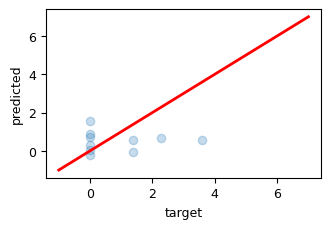

1.0594236612319947

In [8]:
# Plot the predicted vs target values parity plot
import matplotlib.pyplot as plt

plt.scatter(df['True_Label'], df['Prediction'], alpha=0.25)
plt.xlabel('target')
plt.ylabel('predicted')

x = np.linspace(-1, 7, 6)
y = x
plt.plot(x, y, '-r', label='parity')

plt.show()

# pring the mean absolute error
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df['True_Label'], df['Prediction'])